## Explorando as variáveis do dataset de casos
* Verificando medidas de centralidade e dispersão das variáveis
disponíveis

In [2]:
import pandas as pd

O dataset que usaremos tem informações sobre a covid-19 em todos os municípios da Paraíba, atualizado por ultimo dia 22/08/21

In [3]:
casos_df = pd.read_csv("datasets/dados_casos.csv")
casos_df.head(5)

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2021-08-22,PB,Água Branca,city,1128,14,True,10306,2500106,10945.08054,0.0124
1,2021-08-22,PB,Aguiar,city,528,5,True,5630,2500205,9378.33037,0.0095
2,2021-08-22,PB,Alagoa Grande,city,4117,72,True,28439,2500304,14476.59904,0.0175
3,2021-08-22,PB,Alagoa Nova,city,1511,25,True,20921,2500403,7222.40811,0.0165
4,2021-08-22,PB,Alagoinha,city,2072,25,True,14560,2500502,14230.76923,0.0121


### Casos confirmados por município

Armazenados na coluna titulada 'confirmed'

In [4]:
casos_df['confirmed'].describe()

count       223.000000
mean       1930.986547
std        7639.848374
min          60.000000
25%         362.500000
50%         655.000000
75%        1295.000000
max      103940.000000
Name: confirmed, dtype: float64

Usando a função describe, calculamos rapidamente algumas medidas de centralidade e dispersão para a quantidade de casos de cada município.

Vemos que a média de casos por município é 1930,98, porém o desvio padrão é 7639,84.

Podemos também observar que a diferença entre o valor mínimo, o primeiro quartil e o segundo quartil são próximas, em torno de 300 casos. A diferença entre o segundo quartil e o terceiro quartil é o dobro disso, quase 600. Já a diferença entre o terceiro quartil e o valor máximo é mais de 10.000 casos. Com isso, podemos especular que o valor máximo representa um outlier, ou que poucos municípios (menos de 25%) concentram a maior quantidade de casos de covid-19 no Estado.

In [5]:
casos_df['confirmed'].mode()

0      109
1      147
2      212
3      328
4      392
5      454
6      455
7      480
8      530
9      545
10     555
11     559
12     876
13     992
14    1948
Name: confirmed, dtype: int64

Temos muitos valores de moda "empatados", pois temos vários valores diferentes possíveis para a quantidade de casos de um município e eles raramente se repetem. Podemos verificar que cada valor possível para a moda ocorrem apenas duas vezes no dataset:

In [6]:
casos_df[casos_df['confirmed']==109]

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
62,2021-08-22,PB,Coxixola,city,109,4,True,1935,2504850,5633.07494,0.0367
155,2021-08-22,PB,Quixaba,city,109,2,True,1983,2512606,5496.72214,0.0183


In [7]:
casos_df[casos_df['confirmed']==147]

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
133,2021-08-22,PB,Passagem,city,147,2,True,2436,2510709,6034.48276,0.0136
222,2021-08-22,PB,Zabelê,city,147,1,True,2255,2517407,6518.84701,0.0068


In [8]:
casos_df[casos_df['confirmed']==212]

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
46,2021-08-22,PB,Cajazeirinhas,city,212,1,True,3205,2503753,6614.66459,0.0047
82,2021-08-22,PB,Gurjão,city,212,7,True,3453,2506509,6139.58876,0.0330


<AxesSubplot:>

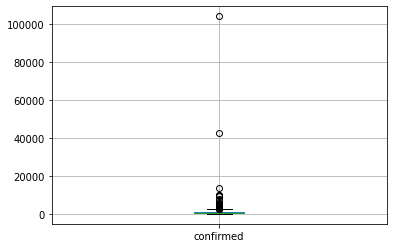

In [9]:
casos_df.boxplot(column = 'confirmed')

In [10]:
casos_df[casos_df['confirmed']>40000]

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
49,2021-08-22,PB,Campina Grande,city,42778,1084,True,411807,2504009,10387.87587,0.0253
93,2021-08-22,PB,João Pessoa,city,103940,2890,True,817511,2507507,12714.20201,0.0278


O boxplot que representa a distribuição dos casos por município é extremamente achatado, de tal forma que se torna ilegível. Isso ocorre pois os dois maiores municípios do Estado, João Pessoa e Campina Grande, concentram muitos mais casos que os demais municípios. Além disso, mesmo não os levando em conta, ainda temos muitos casos outliers além deles. Isso nos mostra que os casos de covid no Estado da Paraíba não estão distribuídos uniformemente entre os municípios, e sim concentrados em focos. 

### Mortes por covid-19 confirmadas por município

Armazenados na coluna titulada 'deaths'

In [11]:
casos_df['deaths'].describe()

count     223.000000
mean       40.973094
std       208.290704
min         0.000000
25%         6.000000
50%        11.000000
75%        25.000000
max      2890.000000
Name: deaths, dtype: float64

 Similarmente à quantidade de casos, a média de mortes por municípios tem média baixa, 40,97, porém desvio padrão alto, 208,29. 

 Vemos que os valores mínino, e de primeiro, segundo e terceiro quartil são próximos (0, 6, 11 e 25 respectivamente), porém o valor máximo apresenta um salto enorme (2890). Vimos que poucos municípios concentram mais casos e consequentemente devem concentrar mais mortes, mas talvez outro fator para esse fenômeno possa ser o fato que municípios menores tem menos estrutura hospitalar para lidar com casos mais graves da doença, e é comum vermos esses pacientes serem transportados para municípios maiores para melhor tratamento. Dessa forma, caso o paciente venha a óbito, talvez ele seja registrado na capital, por exemplo, ao invés do seu município de origem, inflando mais esses números.

In [12]:
casos_df['deaths'].mode()

0    5
Name: deaths, dtype: int64

In [13]:
casos_df['deaths'][casos_df['deaths']==5].count()

16

Dessa vez, como a quantidade de mortes por município é bem menor que a de casos, há menos valores possível para a moda, e há maior incidência do valor entre os dados.

<AxesSubplot:>

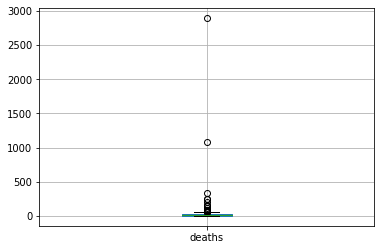

In [14]:
casos_df.boxplot(column = 'deaths')

In [15]:
casos_df[casos_df['deaths']>1000]

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
49,2021-08-22,PB,Campina Grande,city,42778,1084,True,411807,2504009,10387.87587,0.0253
93,2021-08-22,PB,João Pessoa,city,103940,2890,True,817511,2507507,12714.20201,0.0278


Novamente vemos um gráfico boxplot achatado, mostrando que, tal qual os casos de covid-19, as mortes da doença também se concentram em poucos municípios outliers.

### População estimada

Armazenados na coluna titulada 'estimated_population'

In [16]:
casos_df['estimated_population'].describe()

count       223.000000
mean      18113.349776
std       62236.235680
min        1758.000000
25%        4551.500000
50%        7286.000000
75%       15363.000000
max      817511.000000
Name: estimated_population, dtype: float64

Observando as medidas de centralidade dos dados de população dos municípios paraibanos, vemos novamente o comportamento apresentado nas variáveis anteriores: média baixa, desvio padrão alto, valores de primeiro, segundo e terceiro quartil próximos com um salto muito grande entre o último e o valor máximo. Isso nos mostra que grande parte da população do Estado encontra-se concentrada em poucos municípios.

Podemos observar isso melhor no gráfico boxplot da variável.

<AxesSubplot:>

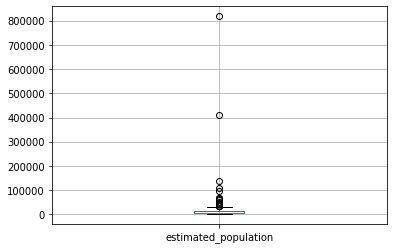

In [17]:
casos_df.boxplot(column = 'estimated_population')

### Casos confirmados por 100 mil habitantes por município

Armazenados na coluna titulada 'confirmed_per_100k_inhabitants'

<AxesSubplot:>

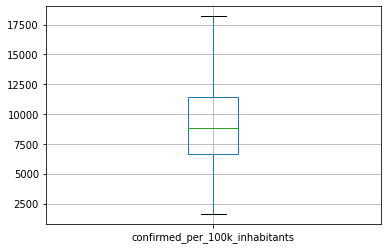

In [19]:
casos_df.boxplot(column = 'confirmed_per_100k_inhabitants')